In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

# 1. Preprocessing phase

In [2]:
dataset= pd.read_csv("titanic-passengers.csv", sep = ";")

In [3]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [5]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
dataset["Age"] = dataset["Age"].fillna( round( dataset["Age"].mean() ) )

In [7]:
dataset["Embarked"] = dataset["Embarked"].fillna("S")

In [8]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [9]:
(dataset["Cabin"].isnull().sum() * 100 )/(dataset.shape[0])

77.10437710437711

In [10]:
dataset = dataset.drop("Cabin", axis=1)

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [12]:
dataset.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [13]:
dataset_or = dataset

In [14]:
dataset["Embarked"]= LabelEncoder().fit_transform(dataset["Embarked"])

In [15]:
dataset["Sex"]= LabelEncoder().fit_transform(dataset["Sex"])

In [16]:
dataset["Survived"]= LabelEncoder().fit_transform(dataset["Survived"])

In [17]:
dataset_or

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,248740,13.0000,2
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,348123,7.6500,2
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,350050,7.8542,2
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,349909,21.0750,2
4,672,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,F.C. 12750,52.0000,2
...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,0
887,61,0,3,"Sirayanian, Mr. Orsen",1,22.0,0,0,2669,7.2292,0
888,535,0,3,"Cacic, Miss. Marija",0,30.0,0,0,315084,8.6625,2
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",1,30.0,0,0,349215,7.8958,2


In [18]:
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,248740,13.0000,2
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,348123,7.6500,2
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,350050,7.8542,2
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,349909,21.0750,2
4,672,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,F.C. 12750,52.0000,2
...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,0
887,61,0,3,"Sirayanian, Mr. Orsen",1,22.0,0,0,2669,7.2292,0
888,535,0,3,"Cacic, Miss. Marija",0,30.0,0,0,315084,8.6625,2
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",1,30.0,0,0,349215,7.8958,2


In [19]:
dataset_1 = dataset.drop("Name", axis=1, inplace = False)

In [20]:
dataset_1

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,0,2,1,28.0,0,0,248740,13.0000,2
1,76,0,3,1,25.0,0,0,348123,7.6500,2
2,641,0,3,1,20.0,0,0,350050,7.8542,2
3,568,0,3,0,29.0,0,4,349909,21.0750,2
4,672,0,1,1,31.0,1,0,F.C. 12750,52.0000,2
...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,0,14.0,1,0,237736,30.0708,0
887,61,0,3,1,22.0,0,0,2669,7.2292,0
888,535,0,3,0,30.0,0,0,315084,8.6625,2
889,102,0,3,1,30.0,0,0,349215,7.8958,2


In [21]:
dataset_1["Ticket"]= LabelEncoder().fit_transform(dataset_1["Ticket"])

In [22]:
dataset_1

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,0,2,1,28.0,0,0,159,13.0000,2
1,76,0,3,1,25.0,0,0,347,7.6500,2
2,641,0,3,1,20.0,0,0,409,7.8542,2
3,568,0,3,0,29.0,0,4,395,21.0750,2
4,672,0,1,1,31.0,1,0,569,52.0000,2
...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,0,14.0,1,0,132,30.0708,0
887,61,0,3,1,22.0,0,0,197,7.2292,0
888,535,0,3,0,30.0,0,0,260,8.6625,2
889,102,0,3,1,30.0,0,0,361,7.8958,2


In [23]:
dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Embarked     891 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 69.7 KB


# 2. Visualization phase:

<AxesSubplot:ylabel='Frequency'>

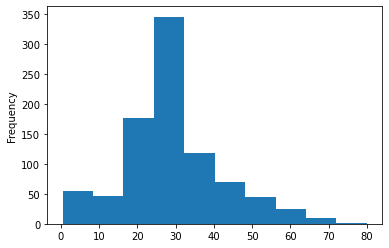

In [24]:
dataset_1["Age"].plot.hist()

    La majorité des passagers du bateau etaient des jeunes d'entre 20ans à 30ans

<AxesSubplot:ylabel='Frequency'>

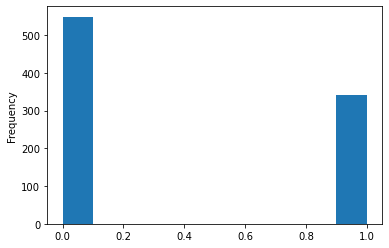

In [25]:
dataset_1["Survived"].plot.hist()

Il y a eu plus de morts que de survivants. mais l'eccart n'etais pas très grande

<AxesSubplot:ylabel='Frequency'>

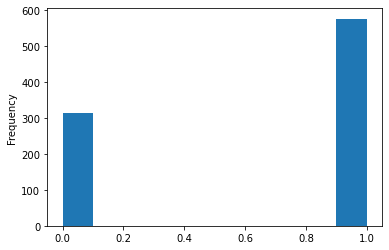

In [26]:
dataset_1["Sex"].plot.hist()

Il y a eu deux fois plus d'hommes que de femmes à bord du bateau

/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


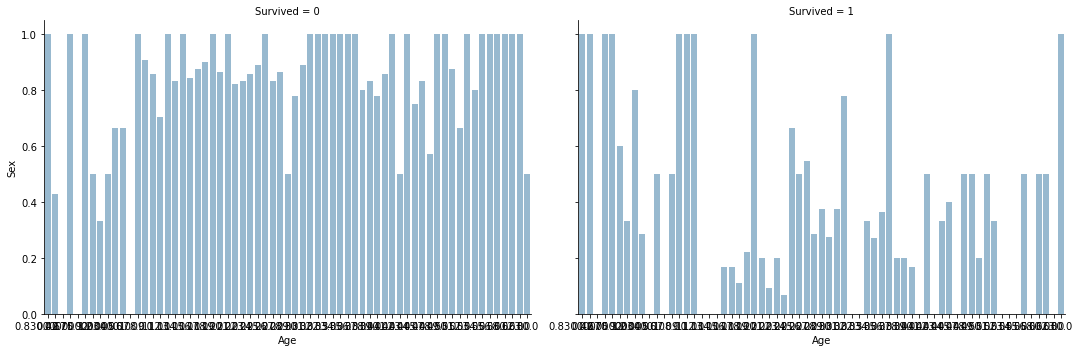

In [27]:
grid= sns.FacetGrid(dataset_1, col="Survived", size=5, aspect=1.5)
grid.map(sns.barplot, "Age", "Sex", alpha=.5, ci=None )
grid.add_legend()

    Il n'y pas eu une grande importance de l'age et du sex dans la survie des personnes mais les jeunes femmes ont eu plus de chance de survie que les jeunes hommes

/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


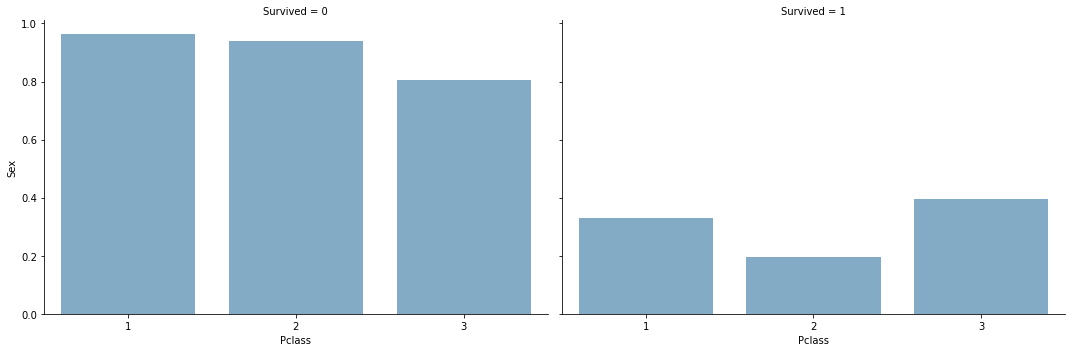

In [28]:
grid= sns.FacetGrid(dataset_1, col="Survived", size=5, aspect=1.5)
grid.map(sns.barplot, "Pclass", "Sex", alpha=.6, ci=None )
grid.add_legend()

Les femmes de la 3e classe ont eu plus de chance avec le survie que celles de la 1er et 2e classe

In [29]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

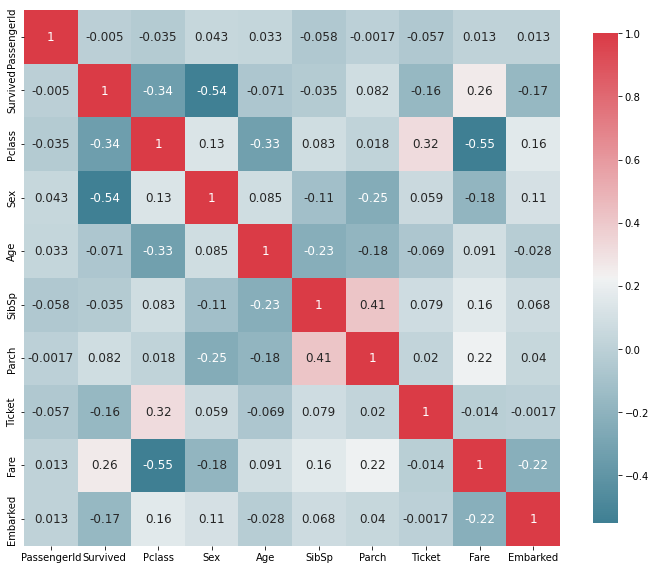

In [30]:
plot_correlation_map(dataset_1)

In [31]:
dataset_1[["Pclass", "Survived"]].groupby(["Pclass"], as_index= True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [32]:
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,248740,13.0000,2
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,348123,7.6500,2
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,350050,7.8542,2
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,349909,21.0750,2
4,672,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,F.C. 12750,52.0000,2
...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,0
887,61,0,3,"Sirayanian, Mr. Orsen",1,22.0,0,0,2669,7.2292,0
888,535,0,3,"Cacic, Miss. Marija",0,30.0,0,0,315084,8.6625,2
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",1,30.0,0,0,349215,7.8958,2


In [33]:
dataset[["title", "name"]]= dataset["Name"].str.split(",", expand= True)

In [34]:
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,title,name
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,248740,13.0000,2,Collander,Mr. Erik Gustaf
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,348123,7.6500,2,Moen,Mr. Sigurd Hansen
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,350050,7.8542,2,Jensen,Mr. Hans Peder
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,349909,21.0750,2,Palsson,Mrs. Nils (Alma Cornelia Berglund)
4,672,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,F.C. 12750,52.0000,2,Davidson,Mr. Thornton
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,0,Nasser,Mrs. Nicholas (Adele Achem)
887,61,0,3,"Sirayanian, Mr. Orsen",1,22.0,0,0,2669,7.2292,0,Sirayanian,Mr. Orsen
888,535,0,3,"Cacic, Miss. Marija",0,30.0,0,0,315084,8.6625,2,Cacic,Miss. Marija
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",1,30.0,0,0,349215,7.8958,2,Petroff,"Mr. Pastcho (""Pentcho"")"


In [35]:
dataset= dataset.drop("Name", axis=1)

In [36]:
dataset.drop("title", axis=1)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,name
0,343,0,2,1,28.0,0,0,248740,13.0000,2,Mr. Erik Gustaf
1,76,0,3,1,25.0,0,0,348123,7.6500,2,Mr. Sigurd Hansen
2,641,0,3,1,20.0,0,0,350050,7.8542,2,Mr. Hans Peder
3,568,0,3,0,29.0,0,4,349909,21.0750,2,Mrs. Nils (Alma Cornelia Berglund)
4,672,0,1,1,31.0,1,0,F.C. 12750,52.0000,2,Mr. Thornton
...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,0,14.0,1,0,237736,30.0708,0,Mrs. Nicholas (Adele Achem)
887,61,0,3,1,22.0,0,0,2669,7.2292,0,Mr. Orsen
888,535,0,3,0,30.0,0,0,315084,8.6625,2,Miss. Marija
889,102,0,3,1,30.0,0,0,349215,7.8958,2,"Mr. Pastcho (""Pentcho"")"


In [37]:
title= dataset["name"].str.split(".", expand= True)

In [38]:
title

,0,1,2
0,Mr,Erik Gustaf,None
1,Mr,Sigurd Hansen,None
2,Mr,Hans Peder,None
3,Mrs,Nils (Alma Cornelia Berglund),None
4,Mr,Thornton,None
...,...,...,...
886,Mrs,Nicholas (Adele Achem),None
887,Mr,Orsen,None
888,Miss,Marija,None
889,Mr,"Pastcho (""Pentcho"")",None


In [39]:
dataset["Title"]= title[0]

In [40]:
title= title.drop(1, axis=1)

In [41]:
title= title.drop(2, axis=1)

In [42]:
title

,0
0,Mr
1,Mr
2,Mr
3,Mrs
4,Mr
...,...
886,Mrs
887,Mr
888,Miss
889,Mr


In [43]:
dataset

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,title,name,Title
0,343,0,2,1,28.0,0,0,248740,13.0000,2,Collander,Mr. Erik Gustaf,Mr
1,76,0,3,1,25.0,0,0,348123,7.6500,2,Moen,Mr. Sigurd Hansen,Mr
2,641,0,3,1,20.0,0,0,350050,7.8542,2,Jensen,Mr. Hans Peder,Mr
3,568,0,3,0,29.0,0,4,349909,21.0750,2,Palsson,Mrs. Nils (Alma Cornelia Berglund),Mrs
4,672,0,1,1,31.0,1,0,F.C. 12750,52.0000,2,Davidson,Mr. Thornton,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,0,14.0,1,0,237736,30.0708,0,Nasser,Mrs. Nicholas (Adele Achem),Mrs
887,61,0,3,1,22.0,0,0,2669,7.2292,0,Sirayanian,Mr. Orsen,Mr
888,535,0,3,0,30.0,0,0,315084,8.6625,2,Cacic,Miss. Marija,Miss
889,102,0,3,1,30.0,0,0,349215,7.8958,2,Petroff,"Mr. Pastcho (""Pentcho"")",Mr


In [44]:
dataset= dataset.drop("title", axis=1)

In [45]:
dataset= dataset.drop("name", axis=1)

In [46]:
dataset

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,343,0,2,1,28.0,0,0,248740,13.0000,2,Mr
1,76,0,3,1,25.0,0,0,348123,7.6500,2,Mr
2,641,0,3,1,20.0,0,0,350050,7.8542,2,Mr
3,568,0,3,0,29.0,0,4,349909,21.0750,2,Mrs
4,672,0,1,1,31.0,1,0,F.C. 12750,52.0000,2,Mr
...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,0,14.0,1,0,237736,30.0708,0,Mrs
887,61,0,3,1,22.0,0,0,2669,7.2292,0,Mr
888,535,0,3,0,30.0,0,0,315084,8.6625,2,Miss
889,102,0,3,1,30.0,0,0,349215,7.8958,2,Mr


/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:675: UserWarning: Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


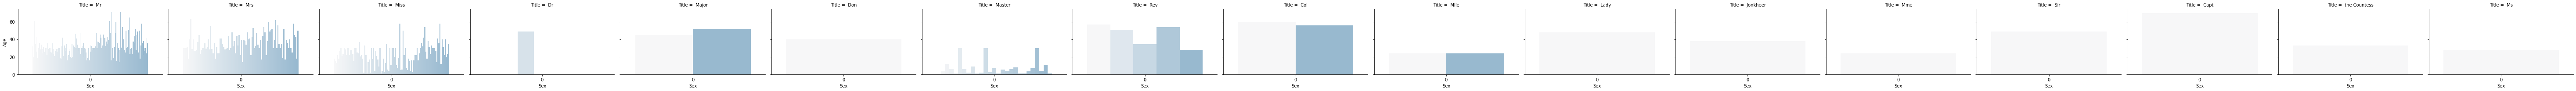

In [47]:
grid_1= sns.FacetGrid( dataset, col="Title", size=3, aspect=1.6 )
grid_1.map(sns.barplot, "Sex", "Age", "Fare", alpha=.5, ci=None)

In [48]:
Title_Dictionary = {

                    "Capt": "Officer",

                    "Col":   "Officer",

                    "Major": "Officer",

                      "Dr":  "Officer",

                    "Rev":   "Officer",

                    "Jonkheer": "Royalty",

                    "Don": "Royalty",

                    "Sir" :  "Royalty",

                   "Lady" :  "Royalty",

                  "the Countess": "Royalty",

                    "Dona":  "Royalty",

                    "Mme":   "Miss",

                    "Mlle":  "Miss",

                    "Miss" :  "Miss",

                    "Ms":  "Mrs",

                    "Mr" :  "Mrs",

                    "Mrs" : "Mrs",

                    "Master" : "Master"

  }



In [49]:
cleanup_Title= {
    "Title": Title_Dictionary
}

In [50]:
dataset.replace(cleanup_Title, inplace= True)

In [51]:
dataset["Title"]

0         Mr
1         Mr
2         Mr
3        Mrs
4         Mr
       ...  
886      Mrs
887       Mr
888     Miss
889       Mr
890     Miss
Name: Title, Length: 891, dtype: object